In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [5]:
df=pd.read_csv('/content/drive/MyDrive/cours_algo_complexite/terrorism.csv',encoding = "ISO-8859-1",index_col='date',parse_dates=True)

#df['date']=pd.to_datetime(df['date'])
#df=df.set_index('date')
df

,eventid,extended,country,region,provstate,city,latitude,longitude,specificity,vicinity,...,gname,guncertain1,individual,weaptype1,weapsubtype1,nkill,nwound,property,ishostkid,dbsource
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01,197001010002,0,217,1,Illinois,Cairo,37.005105,-89.176269,1.0,0,...,Black Nationalists,0.0,0,5,5.0,0.0,0.0,1,0.0,Hewitt Project
1970-01-01,197001050001,0,217,1,Wisconsin,Baraboo,43.468500,-89.744299,1.0,0,...,"Weather Underground, Weathermen",0.0,0,6,16.0,0.0,0.0,0,0.0,PGIS
1970-01-02,197001020001,0,218,3,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,...,Tupamaros (Uruguay),0.0,0,5,2.0,0.0,0.0,0,0.0,PGIS
1970-01-02,197001020002,0,217,1,California,Oakland,37.791927,-122.225906,1.0,0,...,Unknown,0.0,0,6,16.0,0.0,0.0,1,0.0,Hewitt Project
1970-01-02,197001020003,0,217,1,Wisconsin,Madison,43.076592,-89.412488,1.0,0,...,New Year's Gang,0.0,0,8,19.0,0.0,0.0,1,0.0,Hewitt Project
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,201712290032,0,78,8,Attica,Piraeus,37.969891,23.642225,1.0,0,...,Crypteia,0.0,0,13,0.0,0.0,0.0,-9,0.0,START Primary Collection
2017-12-31,201712300002,0,95,10,Kirkuk,Kirkuk,35.452110,44.375465,1.0,0,...,Unknown,0.0,0,6,17.0,0.0,0.0,0,0.0,START Primary Collection
2017-12-31,201712300011,0,37,11,Extreme-North,Bia,11.169421,14.092274,1.0,0,...,Boko Haram,1.0,0,6,13.0,2.0,28.0,1,0.0,START Primary Collection


__Conversion en variables catégorielles__

In [6]:
def convert(df,list):
  for i in list:
    df[i] = df[i].astype('category')


In [7]:
list=['country','region','provstate','city','specificity','vicinity','crit1','crit2','crit3','doubtterr','multiple','success','suicide','attacktype1','targtype1',
      'natlty1','gname','guncertain1','individual','weaptype1','weapsubtype1','property','ishostkid','dbsource'	]

In [8]:
convert(df,list)

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180800 entries, 1970-01-01 to 2017-12-31
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   eventid       180800 non-null  int64   
 1   extended      180800 non-null  int64   
 2   country       180800 non-null  category
 3   region        180800 non-null  category
 4   provstate     180800 non-null  category
 5   city          180800 non-null  category
 6   latitude      180800 non-null  float64 
 7   longitude     180800 non-null  float64 
 8   specificity   180800 non-null  category
 9   vicinity      180800 non-null  category
 10  crit1         180800 non-null  category
 11  crit2         180800 non-null  category
 12  crit3         180800 non-null  category
 13  doubtterr     180800 non-null  category
 14  multiple      180800 non-null  category
 15  success       180800 non-null  category
 16  suicide       180800 non-null  category
 17  attacktype1  

__Encodage de quelques variables catégorielles__

In [9]:
from sklearn import preprocessing

def enc(df,lt):
  for i in lt:
    label_encoder = preprocessing.LabelEncoder() 
    df[i]= label_encoder.fit_transform(df[i])

In [10]:
lt=['provstate','city',
      'gname','dbsource'	]
enc(df,lt)

__Normalisation__

In [11]:
X=df.columns.tolist()

In [12]:
df_minmax = MinMaxScaler().fit_transform(df[X])


In [11]:
df_minmax

array([[2.14332460e-04, 0.00000000e+00, 2.13000000e-01, ...,
        1.00000000e+00, 9.00000000e-01, 3.20000000e-01],
       [2.22820653e-04, 0.00000000e+00, 2.13000000e-01, ...,
        9.00000000e-01, 9.00000000e-01, 5.20000000e-01],
       [2.16454349e-04, 0.00000000e+00, 2.14000000e-01, ...,
        9.00000000e-01, 9.00000000e-01, 5.20000000e-01],
       ...,
       [9.99997873e-01, 0.00000000e+00, 3.30000000e-02, ...,
        1.00000000e+00, 9.00000000e-01, 5.60000000e-01],
       [9.99999995e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 9.00000000e-01, 5.60000000e-01],
       [1.00000000e+00, 0.00000000e+00, 1.56000000e-01, ...,
        9.00000000e-01, 9.00000000e-01, 5.60000000e-01]])

In [13]:
df_minmax=pd.DataFrame(df_minmax) 
df_minmax.index=df.index
df_minmax

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01,0.000214,0.0,0.213,0.000000,0.354101,0.172476,0.705540,0.999997,0.2,0.9,...,0.191695,0.0,0.0,0.333333,0.161290,0.000000,0.000000,1.0,0.9,0.32
1970-01-01,0.000223,0.0,0.213,0.000000,0.966561,0.106129,0.756119,0.999997,0.2,0.9,...,0.973834,0.0,0.0,0.416667,0.516129,0.000000,0.000000,0.9,0.9,0.52
1970-01-02,0.000216,0.0,0.214,0.181818,0.575150,0.619562,0.142920,0.999997,0.2,0.9,...,0.928043,0.0,0.0,0.333333,0.064516,0.000000,0.000000,0.9,0.9,0.52
1970-01-02,0.000216,0.0,0.213,0.000000,0.153115,0.674391,0.711698,0.999997,0.2,0.9,...,0.963879,0.0,0.0,0.416667,0.516129,0.000000,0.000000,1.0,0.9,0.32
1970-01-02,0.000216,0.0,0.213,0.000000,0.966561,0.554610,0.753053,0.999997,0.2,0.9,...,0.642207,0.0,0.0,0.583333,0.612903,0.000000,0.000000,1.0,0.9,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,0.999996,0.0,0.074,0.636364,0.065118,0.723557,0.713090,0.999998,0.2,0.9,...,0.272184,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.9,0.56
2017-12-31,0.999998,0.0,0.091,0.818182,0.439986,0.476525,0.693388,0.999998,0.2,0.9,...,0.963879,0.0,0.0,0.416667,0.548387,0.000000,0.000000,0.9,0.9,0.56
2017-12-31,0.999998,0.0,0.033,0.909091,0.269271,0.135239,0.503365,0.999998,0.2,0.9,...,0.198521,1.0,0.0,0.416667,0.419355,0.001274,0.003418,1.0,0.9,0.56


In [14]:
Y=[i for i in range(0,30)]

In [15]:
df_minmax.rename(columns=dict(zip(Y, X)), inplace=True)
df_minmax

,eventid,extended,country,region,provstate,city,latitude,longitude,specificity,vicinity,...,gname,guncertain1,individual,weaptype1,weapsubtype1,nkill,nwound,property,ishostkid,dbsource
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01,0.000214,0.0,0.213,0.000000,0.354101,0.172476,0.705540,0.999997,0.2,0.9,...,0.191695,0.0,0.0,0.333333,0.161290,0.000000,0.000000,1.0,0.9,0.32
1970-01-01,0.000223,0.0,0.213,0.000000,0.966561,0.106129,0.756119,0.999997,0.2,0.9,...,0.973834,0.0,0.0,0.416667,0.516129,0.000000,0.000000,0.9,0.9,0.52
1970-01-02,0.000216,0.0,0.214,0.181818,0.575150,0.619562,0.142920,0.999997,0.2,0.9,...,0.928043,0.0,0.0,0.333333,0.064516,0.000000,0.000000,0.9,0.9,0.52
1970-01-02,0.000216,0.0,0.213,0.000000,0.153115,0.674391,0.711698,0.999997,0.2,0.9,...,0.963879,0.0,0.0,0.416667,0.516129,0.000000,0.000000,1.0,0.9,0.32
1970-01-02,0.000216,0.0,0.213,0.000000,0.966561,0.554610,0.753053,0.999997,0.2,0.9,...,0.642207,0.0,0.0,0.583333,0.612903,0.000000,0.000000,1.0,0.9,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,0.999996,0.0,0.074,0.636364,0.065118,0.723557,0.713090,0.999998,0.2,0.9,...,0.272184,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.9,0.56
2017-12-31,0.999998,0.0,0.091,0.818182,0.439986,0.476525,0.693388,0.999998,0.2,0.9,...,0.963879,0.0,0.0,0.416667,0.548387,0.000000,0.000000,0.9,0.9,0.56
2017-12-31,0.999998,0.0,0.033,0.909091,0.269271,0.135239,0.503365,0.999998,0.2,0.9,...,0.198521,1.0,0.0,0.416667,0.419355,0.001274,0.003418,1.0,0.9,0.56


In [16]:
#Convertion de y en matrix
y=df_minmax['suicide'].to_numpy()
y

array([0., 0., 0., ..., 1., 0., 0.])

In [3]:
# Foncyion por décomposer en produit de facteur premier
def decompose (n): 
    print("%d=1"%(n), end=' ') 
    i=2 
    while n>1: 
        while n%i==0: 
            print("x",i, end=' ') 
            n=n/i 
        i=i+1 
    print("\n") #saut de ligne 
 

In [4]:
decompose(180800)

180800=1 x 2 x 2 x 2 x 2 x 2 x 2 x 5 x 5 x 113 



In [17]:
#Convertion du tableau en deux dimentions
y=y.reshape(1600,113)

Dindogram de la variable suicide

In [18]:
import plotly.figure_factory as ff

import numpy as np

fig = ff.create_dendrogram(y, color_threshold=1.5)
fig.update_layout(width=800, height=500)
fig.show()

Dindogram de la variable targtype1

In [19]:
x=df_minmax['targtype1'].to_numpy()
x=x.reshape(1600,113)

fig = ff.create_dendrogram(x, color_threshold=1.5)
fig.update_layout(width=800, height=500)
fig.show()

__Visualisation__

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



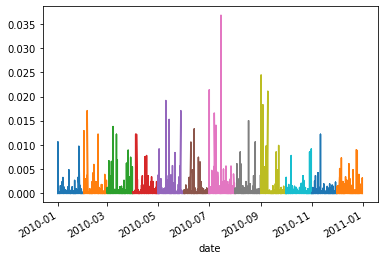

In [20]:
# L'évolution du nombre de bléssés  par mois suivant l'année 2010
df_minmax['2010']['nwound'].resample('M').plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



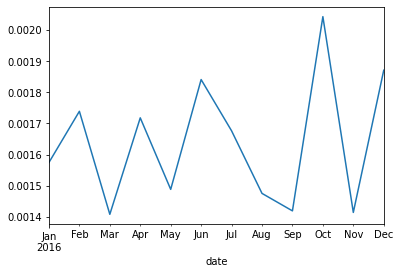

In [21]:
#df['2016']['nkill'].plot()
# L'évolution moyen du nombre de morts  par mois suivant l'année 2016
df_minmax['2016']['nkill'].resample('M').mean().plot()
plt.show()

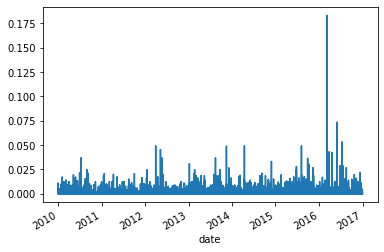

In [22]:
# L'évolution du nombre de bléssés de 2010 à 2016 
df_minmax.loc['2010':'2016','nwound'].plot()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

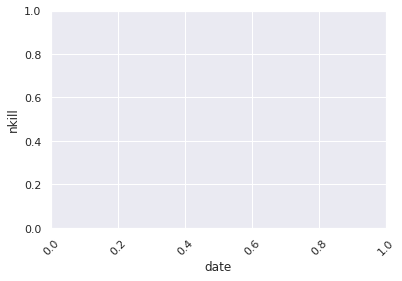

In [23]:
sns.set()
plt.ylabel('nkill')
plt.xlabel('date')
plt.xticks(rotation=45)

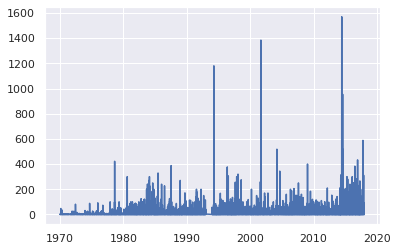

In [24]:
plt.plot(df.index, df['nkill'], )

__Fractionnement des données pour la formation et les tests__

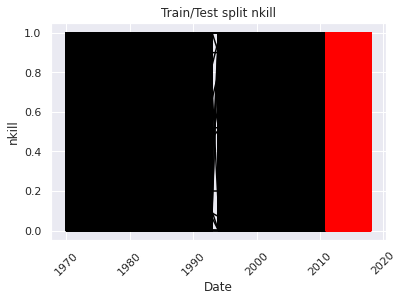

In [25]:
train = df_minmax[df_minmax.index < pd.to_datetime("2010-12-31", format='%Y-%m-%d')]
test = df_minmax[df_minmax.index > pd.to_datetime("2010-12-31", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('nkill')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split nkill")
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
fit2= ARIMA(df_minmax["nkill"], order=(1, 0, 0)).fit(disp=0)
print(fit2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                              ARMA Model Results                              
Dep. Variable:                  nkill   No. Observations:               180800
Model:                     ARMA(1, 0)   Log Likelihood              636512.324
Method:                       css-mle   S.D. of innovations              0.007
Date:                Fri, 20 May 2022   AIC                       -1273018.648
Time:                        03:25:56   BIC                       -1272988.332
Sample:                             0   HQIC                      -1273009.686
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0014   1.76e-05     82.017      0.000       0.001       0.001
ar.L1.nkill     0.0456      0.002     19.400      0.000       0.041       0.050
                                    Roots       

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
y = train['nwound']
SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Générez nos prédictions :

Méthode ARMA

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [27]:
y = train['nkill']
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



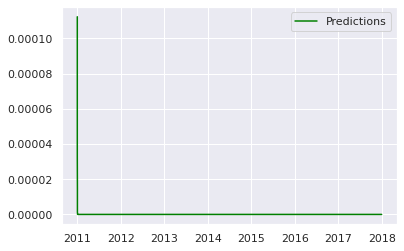

In [28]:
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

In [30]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["nkill"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)


RMSE:  0.0071716255574545


SARIMAX

In [ ]:
SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()